In [46]:
import numpy as np
import scipy as sp
import scipy.signal
import scipy.integrate
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()


In [57]:
# type: 'sin'|'exp'|'poly'
# params: (a, b, c, d)
# noise_params: (noise_m, noise_d)
def U(type, params, t, noise_params=(0,0)):
    a, b, c, d = params
    noise_m, noise_d = noise_params
    noise = np.zeros_like(t)
    if noise_m != 0 or noise_d != 0:
        noise = np.random.rand(t.shape) * noise_d + noise_m
    if type == 'poly':
        return a + t * (b + t * (c + t * d)) + noise
    if type == 'sin':
        return a + b * np.sin( c*t + d) + noise
    if type == 'exp':
        return a * np.exp(b * t) + noise
    raise ValueError()

def simulate(u_type, u_params, A, B, C, D, x0, u_noise_params=(0,0), y_noise_params=(0,0), t0=0, t1=1, dt=0.001):
    def F(t, x):
        return A @ x + B * U(u_type, u_params, t, u_noise_params)
    def Y(t, x):
        return C @ x + D * U(u_type, u_params, t, u_noise_params)
    sol = solve_ivp(F, [t0, t1], y0=x0, dense_output=True)
    T = np.arange(t0, t1, dt)
    plt.plot(T, sol.sol(T).T, label=['x1','x2'])
    plt.plot(T, Y(T, sol.sol(T)).T, label=['y1','y2'])
    plt.plot(T, U(u_type, u_params, T, u_noise_params), label='U')
    plt.xlabel('t')
    plt.legend(shadow=True)
    plt.gcf().set_size_inches((12,6))
    plt.show()


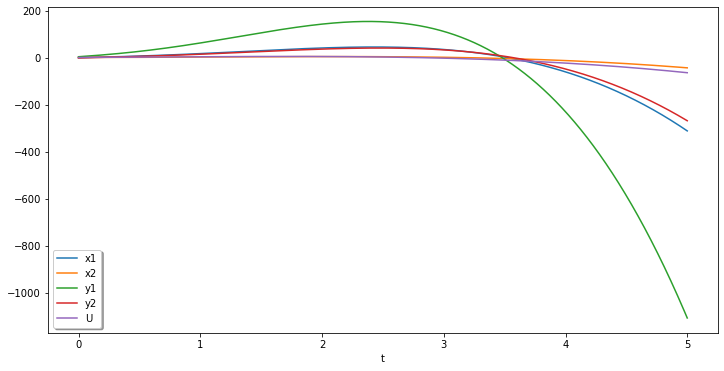

In [58]:
A = np.array([
    [-1, 5],
    [0, -2]
])
B = np.array([7,2])
C = np.array([
    [3,4],
    [1,-1]
])
D = 0
x0 = np.array([0, 1])

u_type = 'poly'
u_params = 1, 2, 2, -1

simulate(u_type, u_params, A, B, C, D, x0, t0=0, t1=5)